<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab9/prac9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting information from an image


Step 1 : segment the image ---> objects or regions regions in a form suitable for computer processing

Step 2 : describe and represent the segmented

Step 3 : image recognition and interpretation



In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from PIL import Image
import random
import pandas as pd

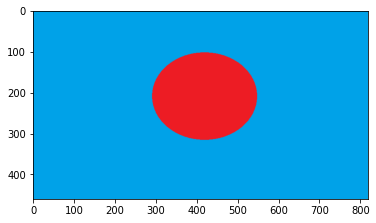

In [ ]:
image1 = skimage.io.imread('/content/circle.png')
image2 = skimage.io.imread('/content/rect.png')
plt.imshow(image1,cmap='gray')

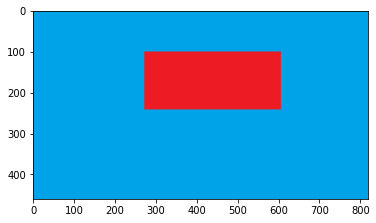

In [ ]:
plt.imshow(image2,cmap='gray')

In [ ]:
image1.shape

(460, 819, 3)

In [ ]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [ ]:
def convolve(mask,image,s):
  out = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      s1=0
      if(i-s//2 >=0 and j-s//2>=0 and i+s//2<image.shape[0] and j+s//2<image.shape[1]):
        i2=0
        for i1 in range(i-s//2,i+s//2+1):
          j2=0
          for j1 in range(j-s//2,j+s//2+1):
            s1+=image[i1][j1]*mask[i2][j2]
            # print(image[i1][j1],mask[i2][j2])
            j2+=1
          i2+=1
        out[i][j] = s1

  return out

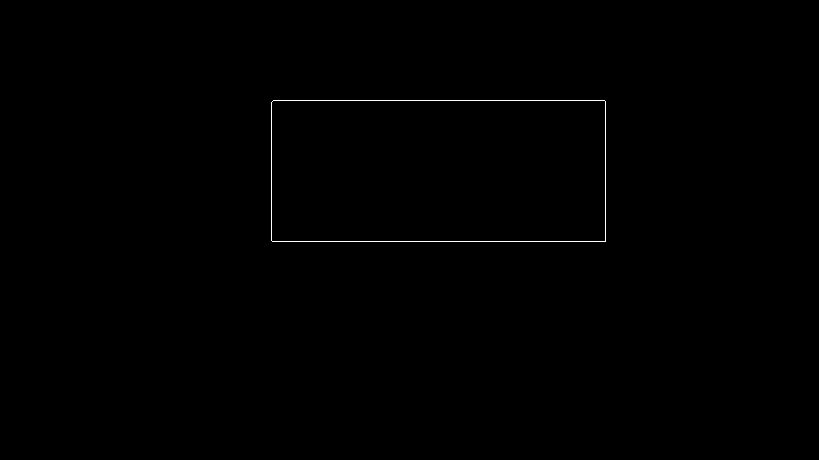

In [ ]:
img = cv2.imread('/content/rect.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2_imshow(edges)

438 170


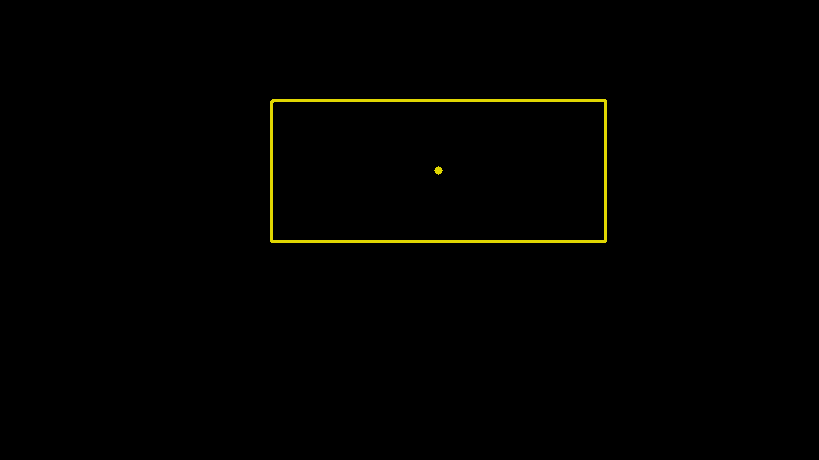

In [ ]:

contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mu = [None]*len(contours)
for i in range(len(contours)):
  mu[i] = cv2.moments(contours[i])

mc = [None]*len(contours)
for i in range(len(contours)):
    # add 1e-5 to avoid division by zero
  mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))

drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

for i in range(len(contours)):
  color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
  cv2.drawContours(drawing, contours, i, color, 2)
  cv2.circle(drawing, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)

print(int(mc[i][0]), int(mc[i][1]))
cv2_imshow(drawing)

(460, 819)


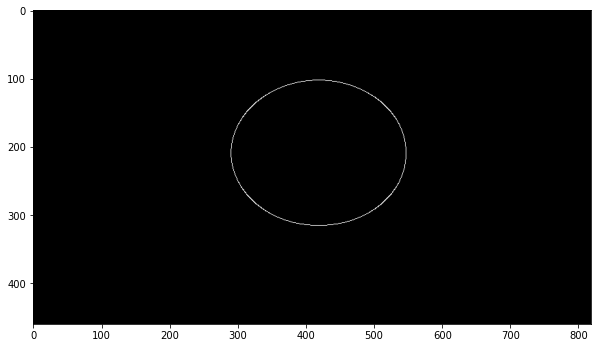

In [ ]:
t_lower = 20  # Lower Threshold
t_upper = 200  # Upper threshold

edge1 = cv2.Canny(image1, t_lower, t_upper)
edge_arr1 = np.asarray(edge1)
print(edge_arr1.shape)
data_2 = Image.fromarray(edge_arr1)
plt.figure(figsize=(10,10))
plt.imshow(data_2,cmap="gray")
plt.show()

418 208


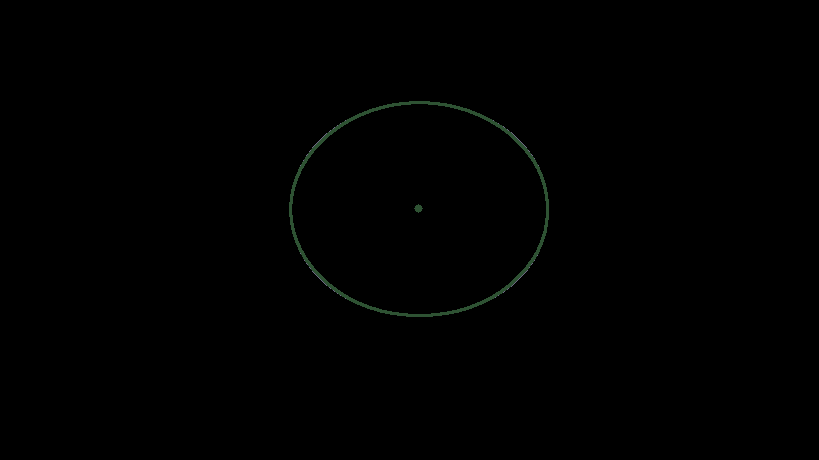

In [ ]:

contours, hierarchy = cv2.findContours(edge1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mu = [None]*len(contours)
for i in range(len(contours)):
  mu[i] = cv2.moments(contours[i])

mc = [None]*len(contours)
for i in range(len(contours)):
    # add 1e-5 to avoid division by zero
  mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))

drawing = np.zeros((edge1.shape[0], edge1.shape[1], 3), dtype=np.uint8)

for i in range(len(contours)):
  color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
  cv2.drawContours(drawing, contours, i, color, 2)
  cv2.circle(drawing, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)

print(int(mc[i][0]), int(mc[i][1]))
cv2_imshow(drawing)

Steps for LoG:

1. Apply LoG on the image. This can be done in two ways:

  a. First, apply Gaussian and then Laplacian

  b. Convolve the image with LoG kernel directly

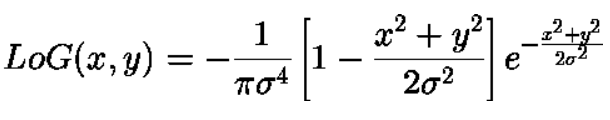

2. Find the zero crossings in the image

3. Threshold the zero crossings to extract only the strong edges.

In [ ]:
def thresholding(image,level):

  threshold = 255 / (level)
  new_img=[]
  for i in range(image.shape[0]):
    temp=[]
    for j in range(image.shape[1]):
      temp1=[]
      if(image[i][j]//threshold == 0):
        temp1.append(0)
      else:
        temp1.append(threshold*(image[i][j]//threshold+1))

      temp.append(temp1)
    new_img.append(temp)
  return new_img

In [ ]:
X = [[-1,-1,-1],[0,0,0],[-1,-1,-1]]
Y = [[-1,0,-1],[-1,0,-1],[-1,0,-1]]
def gaussian(image,sigma):
  kernel = np.zeros((3,3))
  sum=0
  for i in range(3):
    for j in range(3):
      x = X[i][j]**2+Y[i][j]**2
      kernel[i][j] = (7/(2*22*sigma*sigma))*math.exp((-1*x)/(2*sigma*sigma))
      sum+=kernel[i][j]
  return kernel
  # print(kernel,sum)
  # for i in range(image.shape[0]):
  #   for j in range(image.shape[1]):

# kernel = gaussian(image1,1)


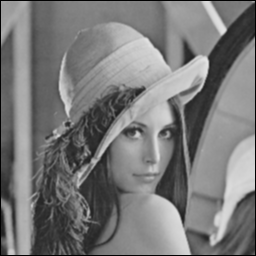

In [ ]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
img_=convolve(kernel/16,image1,3)
cv2_imshow(img_)

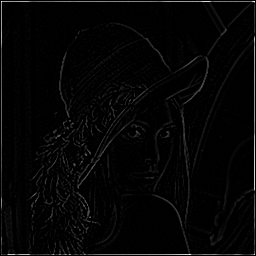

In [ ]:
# mask = [[0,1,0],[1,-4,1],[0,1,0]]
mask = [[0,-1,0],[-1,4,-1],[0,-1,0]]
img_ = convolve(mask,img_,3)
cv2_imshow(img_)

In [ ]:
# Discontinuity
def Zero_crossing(image):
    img = np.zeros(image.shape)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
            z_c = ((negative_count > 0) and (positive_count > 0))

            # Change the pixel value with the maximum neighborhood
            # difference with the pixel

            if z_c:
                if image[i,j]>0:
                    img[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    img[i, j] = np.abs(image[i,j]) + d

    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = img/img.max()*255
    img = np.uint8(z_c_norm)

    return img

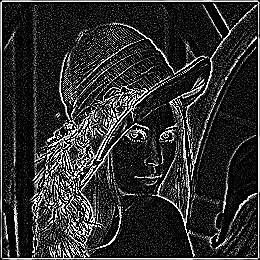

In [ ]:
from scipy.signal import convolve2d
LoG_kernel = np.array([
                        [0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2,-16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]
                    ])
# img_=convolve(LoG_kernel,image1,5)
img_=convolve2d(image1,LoG_kernel)
cv2_imshow(img_)

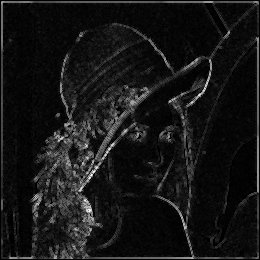

In [ ]:
img_ = np.asarray(Zero_crossing(img_))
cv2_imshow(img_)

Morphological

In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow

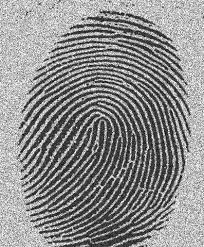

In [ ]:
image = skimage.io.imread('/content/fingerprint.jpeg')
cv2_imshow(image)

In [ ]:
image.shape

(247, 204, 3)

Bit plane

In [ ]:
skimage.io.imread('')